# colab

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
# !cp -r /content/drive/MyDrive/IC\ CNC/cutting_tests_processed /content/
# path_df_processed = "/content/drive/MyDrive/IC CNC/cutting_tests_processed"

In [2]:
# ! cp /content/dados-chatter/timeSeries_3inchStickout/F_12-Jun-2017_rpm570_doc0p015.mat /content/

In [3]:
# ! rm -r split_cutting_tests_processed 

In [4]:
# creating new folders that will withhold the new dataframes created by spliting
# ! mkdir split_cutting_tests_processed 
# ! cd split_cutting_tests_processed 
# list_of_folders = listdir("cutting_tests_processed")
# for folder in list_of_folders:
#     list_of_files = listdir(f'cutting_tests_processed/{folder}')
#     ! mkdir split_cutting_tests_processed/{folder}

# libraries and data


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as sc
import scipy.stats
from scipy.fft import fft, fftfreq
from scipy.fftpack import fft, ifft 
from os import listdir
import os.path
import shutil 
from sklearn import *
import sklearn
from sklearn.preprocessing import *
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC


In [6]:
success = True
while success == True:
    try:
        shutil.rmtree('split_cutting_tests_processed')
        success = False
    except:
        success = False

In [7]:
# creating directory using os
success = True
while success == True:
    try: 
        list_of_folders = listdir("cutting_tests_processed")
        for folder in list_of_folders:
            os.makedirs(f'split_cutting_tests_processed/{folder}')
        success = False
    except:
        success = False

https://realpython.com/python-scipy-fft/

https://docs.scipy.org/doc/scipy/tutorial/fft.html

In [8]:
# list_of_folders = listdir("cutting_tests_processed")
for folder in list_of_folders:
    list_of_files = listdir(f'cutting_tests_processed/{folder}')
    for file in list_of_files:
        if file[0] != 'u':
            ''' spliting each processed data into for new files
            saves them as files in the same organization logic as the original files
            files classified as unkown were not used
            '''
            data = sc.loadmat(f'cutting_tests_processed/{folder}/{file}')
            df = pd.DataFrame.from_dict(data['tsDS'][:,:])
            df.rename({0: 't', 1: 'y'}, axis=1, inplace=True)
            
            freq = np.fft.fftfreq(len(df['t']), df['t'][1] - df['t'][0])
            yf = np.fft.fft(df['y'])
            df['fft'] = yf
            df['fftfreq'] = freq # omega
            
            df_split = np.array_split(df,4)
            for split_num in np.arange(4):
                df_split[split_num] = df_split[split_num].reset_index(drop=True)
                print(df_split[split_num].head())
                df_split[split_num].to_csv(f'split_cutting_tests_processed/{folder}/{file[:-4]}_split_{split_num}.csv')

            print(df_split)

          t         y                   fft   fftfreq
0  6.249994 -0.000017  137.838567-0.000000j  0.000000
1  6.250094  0.000505  0.0225460-0.0436990j  0.399984
2  6.250194 -0.000425  0.0208130-0.0216400j  0.799968
3  6.250294  0.003123 -0.0060590-0.0280480j  1.199952
4  6.250394  0.007883 -0.0398030-0.0015580j  1.599936
          t         y                 fft      fftfreq
0  6.875094  0.007293 -0.000271+0.083025j  2500.299988
1  6.875194  0.006835  0.136543+0.076887j  2500.699972
2  6.875294  0.006519  0.136337+0.080770j  2501.099956
3  6.875394  0.005711 -0.076551+0.245695j  2501.499940
4  6.875494  0.007213 -0.219227-0.108445j  2501.899924
          t         y                 fft      fftfreq
0  7.500094  0.006837  0.014737+0.031209j -4999.800008
1  7.500194  0.007461 -0.106196-0.057345j -4999.400024
2  7.500294  0.008481  0.056427-0.045229j -4999.000040
3  7.500394  0.009725  0.030586-0.023642j -4998.600056
4  7.500494  0.009068  0.015831+0.030521j -4998.200072
          t     

In [9]:
# for folder in list_of_folders:
#     list_of_files = listdir(f'cutting_tests_processed/{folder}')
#     for file in list_of_files:
#         if file[0] != 'u':
#             data = sc.loadmat(f'cutting_tests_processed/{folder}/{file}')
#             df = pd.DataFrame.from_dict(data['tsDS'][:,:])
#             df.rename({0: 't', 1: 'y'}, axis=1, inplace=True)
            
#             freq = np.fft.fftfreq(len(df['t']), df['t'][1] - df['t'][0])
#             yf = np.fft.fft(df['y'])
            
#             # plt.figure()
#             # plt.title(f'{file}')
#             # plt.xlabel('f')
#             # plt.ylabel('A')
#             # plt.plot(freq,yf)
#             # plt.show()
#             df['fft'] = yf
#             df['fftfreq'] = freq # omega

In [10]:
# for folder in list_of_folders:
#     list_of_files = listdir(f'cutting_tests_processed/{folder}')
#     for file in list_of_files:
#         if file[0] != 'u':
#             data = sc.loadmat(f'cutting_tests_processed/{folder}/{file}')
#             df = pd.DataFrame.from_dict(data['tsDS'][:,:])
#             df.rename({0: 't', 1: 'y'}, axis=1, inplace=True)
            
#             plt.figure()
#             plt.title(f'{file}')
#             plt.xlabel('t')
#             plt.ylabel('y')
#             plt.plot(df['t'], df['y'])

# !!

In [11]:
list_of_folders = listdir("split_cutting_tests_processed")
cols = {'t': [],
        'y': [],
        'fft': [],
        'fftfreq': []} # dictionary to whom the data will be added to create a df
for folder in list_of_folders:
    list_of_files = listdir(f'split_cutting_tests_processed/{folder}')
    for file in list_of_files:
        # if file[0] != 'u':
        ''' Adding noise to all the split data files and saving it as a separate file.
            The only column to whom was added noise is the "y" column. The other one
            represents time, therefor cannot have added noise. 
            The files classified as "unknown" for the presence of chatter were not used 
            '''
        df = pd.read_csv(f'split_cutting_tests_processed/{folder}/{file}')
        df['y'] = df['y'].astype('float')
        df['t'] = df['t'].astype('float')

        mu, sigma = 0, np.sqrt(np.mean(df['y']**2))*0.1 # adding noise using rms
        noise = np.random.normal(mu, sigma, df['y'].shape)

        cols['y'] = df['y'] + noise
        cols['t'] = df['t']

        freq = np.fft.fftfreq(len(cols['t']), cols['t'][1] - cols['t'][0])
        yf = np.fft.fft(cols['y'])
        cols['fft'] = yf
        cols['fftfreq'] = freq # omega
        
        df_noise_added = pd.DataFrame(cols)
        df_noise_added.to_csv(f'split_cutting_tests_processed/{folder}/{file[:-4]}_noise_added.csv')


In [12]:
# list_of_folders = listdir("split_cutting_tests_processed")
# for folder in list_of_folders:
#     list_of_files = listdir(f'split_cutting_tests_processed/{folder}')
#     for file in list_of_files:
#             ''' ploting split data with and without noise
#             '''
#         # if 
#             df_no_noise = pd.read_csv(f'/content/split_cutting_tests_processed/{folder}/{file}')
#             plt.figure(figsize=(10.0,9.0))
#             plt.title(f'{file}')
#             plt.xlabel('Time')
#             plt.ylabel('y')
#             plt.plot(df_no_noise['t'], df_no_noise['y'])
#             plt.show()
#         # else:
#             df_noise_added = pd.read_csv(f'/content/split_cutting_tests_processed/{folder}/{file}')
#             plt.figure(figsize=(10.0,9.0))
#             plt.title(f'{file}')
#             plt.xlabel('Time')
#             plt.ylabel('y')
#             plt.plot(df_noise_added['t'], df_noise_added['y'], c='C1')
#             plt.show()

In [13]:
# # list_of_folders = listdir("split_cutting_tests_processed")
# # for folder in list_of_folders:

# list_of_files = listdir(f'split_cutting_tests_processed/2inch_stickout')
# for file in list_of_files:
#     ''' printing files with fft transformation
#     '''
#     file_ = pd.read_csv(f'split_cutting_tests_processed/2inch_stickout/{file}')
#     plt.figure(figsize=(10,9))
#     plt.title(f'{file}')
#     plt.xlabel('time')
#     plt.ylabel('FFT amplitude')
#     plt.plot(file_['t'],scipy.fftpack.fft(file_['y'].values))

the following cell finds the highest and second highest values of fft transformation for y column.
Since they are not saved in it, it was turned into a comment. 

In [14]:
# list_of_folders = listdir("split_cutting_tests_processed")
# for folder in list_of_folders:
#     list_of_files = listdir(f'split_cutting_tests_processed/{folder}')
#     for file in list_of_files:
#         ''' finding the highest and second highest frequencies
#         '''
#         file_ = pd.read_csv(f'split_cutting_tests_processed/2inch_stickout/{file}')
#         fft_ = scipy.fftpack.fft(file_['y'].values) 
#         max_fft_amplitude = fft_.max()
#         fft_amplitudes = sorted(np.array(fft_))
#         print(f'max: {max_fft_amplitude} \n second highest: {fft_amplitudes[-2]}')


In [15]:
df
# df_noise_added.shape # shape of the last split file saved

,Unnamed: 0,t,y,fft,fftfreq
0,0,7.968794,0.006407,(0.2042384655223556+8.653869740015557e-05j),2500.011429
1,1,7.968894,0.004910,(0.0914314116212867+0.046507481969749215j),2500.057143
2,2,7.968994,0.007336,(-0.37777500114293816+0.22917291331089795j),2500.102857
3,3,7.969094,0.006245,(0.11317171466029798+0.7671436774249674j),2500.148571
4,4,7.969194,0.007338,(0.3504126946513628-0.1234408042150042j),2500.194285
...,...,...,...,...,...
54683,54683,13.437094,0.006022,(0.5454155670414084-0.008776659880109922j),4999.794287
54684,54684,13.437194,0.006639,(0.28819371107205444-0.4957384954209865j),4999.840001
54685,54685,13.437294,0.005845,(0.10013599775036819-0.09141667297969999j),4999.885715
54686,54686,13.437394,0.007055,(0.005324624197367733-0.0714289448221827j),4999.931429


# creating new df with math features


defining the function used in the creation of the dataframe as to keep the formulas more organized and easy to read. 

In [16]:
def thd(data_): # true harmonic distortion
    sq_sum = 0.0
    for r in range(len(data_)):
        sq_sum = sq_sum + data_[r]**2
    sq_harmonics = sq_sum - max(data_)**2
    return 100*sq_harmonics**0.5 / max(data_)

def rms(data_):
    return np.sqrt(np.mean(data_**2))

def amp(data_):
    return max(data_) - min(data_)

def SRA(data_):
    return np.mean(np.sqrt(np.abs(data_)))**2

def crest(data_):
    return max(np.abs(data_))/np.sqrt(np.mean(data_**2))

def impulse(data_):
    return max(np.abs(data_))/np.mean(abs(data_))

def margin(data_):
    return max(abs(data_))/np.mean(np.sqrt(np.abs(data_)))**2

def freq_max(data_):
    # sorted(np.array(scipy.fftpack.fft(file['y'].values)))[-2]
    # print(data_)
    print(data_['fftfreq'][data_['fft'] == data_['fft'].max()].values[0])

def freq_sec_highest(data_):
    # sorted(np.array(scipy.fftpack.fft(file['fftfreq'].values)))[-3]
    data_sorted = data_.sort_values(by = ['fft'], ascending = False)
    return data_sorted['fftfreq'][1]

def freq_mean(data_):
    return data_['fftfreq'].mean()

# def freq_pico(data_):
#     # sorted(np.array(scipy.fftpack.fft(file['y'].values)))[-2]
#     return data_['fftfreq'].max()

        # cols['freq_max'].append(scipy.fftpack.fft(file['y'].values).max()) # https://gist.github.com/endolith/255291
        # cols['freq_sec_highest'].append(sorted(np.array(scipy.fftpack.fft(file['y'].values)))[-2]) 
        # cols['freq_mean'].append(scipy.fftpack.fft(file['y'].values).mean()) 


fiquei em dúvida sobre se deixava o -2 como segundo maior ou o -3, pois caso fosse -2 estaríamos contando o ponto inicial como o maior, que é sempre o maior. Outlier?

In [17]:
cols = {'Experiment': [],
        'chatter_presence': [],
        'med': [],
        'std': [],
        'rms': [],
        'curtose': [],
        'distortion': [],
        'amplitude': [],
        'sra': [],
        'crest': [],
        'impulse': [],
        'margin': [],
        'max': [],
        'freq_max': [],
        'freq_sec_highest': [],
        'freq_mean': []}

for folder in list_of_folders:
    list_of_files = listdir(f'split_cutting_tests_processed/{folder}')
    for file in list_of_files:
        cols['Experiment'].append(f'{file[:-4]}')
        cols['chatter_presence'].append(f'{file[:1]}')
        
        print(file)
        file = pd.read_csv(f'split_cutting_tests_processed/{folder}/{file}', index_col=0)
        # freq = np.fft.fftfreq(len(file['t']), file['t'][1] - file['t'][0])
        # yf = np.fft.fft(file['y'])
        # file['fft'] = yf
        # file['fftfreq'] = freq # omega
        # print(file.columns)
        # print('0:', file[0])
        # print('1:', file[1])
        
        # print(file['Unnamed: 0'])
        # print(file.head())
                
        cols['med'].append(file['y'].mean())
        cols['std'].append(file['y'].std())
        cols['rms'].append(rms(file['y']))
        
        cols['curtose'].append(scipy.stats.kurtosis(file['y']))
        cols['distortion'].append(thd(file['y']))
        cols['amplitude'].append(amp(file['y']))
        cols['sra'].append(SRA(file['y']))
        
        cols['crest'].append(crest(file['y']))
        cols['impulse'].append(impulse(file['y']))
        cols['margin'].append(margin(file['y']))
        cols['max'].append(file['y'].max())
        
        cols['freq_max'].append(freq_max(file)) # https://gist.github.com/endolith/255291
        cols['freq_sec_highest'].append(freq_sec_highest(file)) 
        cols['freq_mean'].append(freq_mean(file))




i_570_002_split_2_noise_added.csv
0.0
i_570_002_split_3_noise_added.csv
-1664.1065028200585
s_320_045_split_1.csv
3075.2538494994683
s_320_015_split_0.csv
119.8664002971676
s_320_020_split_3.csv
-119.59880401223862
c_770_005_split_3.csv
-945.8624628315024
s_320_005_split_1_noise_added.csv
1926.1999999360569
c_770_002_split_0.csv
933.5751046660512
s_425_015_split_3.csv
-69.03944768519261
s_320_045_split_3_noise_added.csv
-360.0799999880466
s_320_020_split_1.csv
4628.853711473674
s_570_005_split_2.csv
-4968.503149696611
s_425_010_split_3.csv
-295.7576339422446
s_320_020_split_1_noise_added.csv
-3635.200000008472
s_320_015_split_3.csv
-119.8664002971676
s_320_050_2_split_0_noise_added.csv
-4362.47516700794
i_570_002_split_0.csv
0.0
c_770_002_2_split_0.csv
1071.7785644312094
s_425_017_split_3_noise_added.csv
-118.40000000027594
i_320_010_split_1_noise_added.csv
0.0
s_425_010_split_2.csv
-4314.365485124493
i_425_025_split_0_noise_added.csv
-3581.8269077031164
s_320_020_2_split_3_noise_added

In [18]:
# print(cols)
dataframe = pd.DataFrame(cols)
dataframe

,Experiment,chatter_presence,med,std,rms,curtose,distortion,amplitude,sra,crest,impulse,margin,max,freq_max,freq_sec_highest,freq_mean
0,i_570_002_split_2_noise_added,i,0.005509,0.003118,0.006329,3.245333,1777.397601,0.033926,0.005314,3.510712,3.907285,4.181948,0.022221,None,2.560164,-1.280082
1,i_570_002_split_3_noise_added,i,0.005499,0.003668,0.006609,3.233794,1873.372417,0.037886,0.005344,3.331380,3.790423,4.120045,0.022019,None,2.560164,-1.280082
2,s_320_045_split_1,s,0.005482,0.002285,0.005940,-0.684501,13046.608858,0.019401,0.005217,2.709846,2.934679,3.084994,0.016095,None,2500.035000,3750.002500
3,s_320_015_split_0,s,0.005475,0.002081,0.005857,-0.254890,7052.357014,0.041907,0.005266,4.755544,5.084255,5.289695,0.027854,None,0.022222,1249.997222
4,s_320_020_split_3,s,0.005492,0.001971,0.005835,-1.170823,8819.340916,0.010459,0.005303,1.792693,1.904703,1.972551,0.010460,None,-2499.875001,-1250.037500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,s_770_002_split_1,s,0.005467,0.002554,0.006034,1.406596,2328.811864,0.027256,0.005213,3.391607,3.704621,3.925651,0.020464,None,2500.699972,3750.049998
724,s_570_005_2_split_3,s,0.005462,0.001619,0.005697,-0.356039,5265.633545,0.013925,0.005334,2.373455,2.475475,2.535030,0.013522,None,-2499.800003,-1250.059999
725,i_770_005_split_2,i,0.005482,0.003982,0.006776,1.860644,3536.756650,0.037606,0.005365,3.388638,3.899269,4.279893,0.022961,None,-4999.739135,-3750.021739
726,c_770_005_split_3_noise_added,c,0.005410,0.008856,0.010377,1.100665,1782.504280,0.089460,0.007007,4.786202,6.010930,7.088408,0.039793,None,2.133561,0.000000


tabela

análise de cluster *

fórmulas 

u como teste e case

i: describe, análise automatizada? (fft/n), 

eda

encontrar forma mais otimizada de fazer os loops, estão levando minutos

In [19]:
dataframe.to_csv('math_outputs.csv')

/tmp/ipykernel_26279/3638022587.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataframe.corr(method="pearson")
/tmp/ipykernel_26279/3638022587.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataframe.corr(), annot=True, fmt=".2f", cmap='Purples')


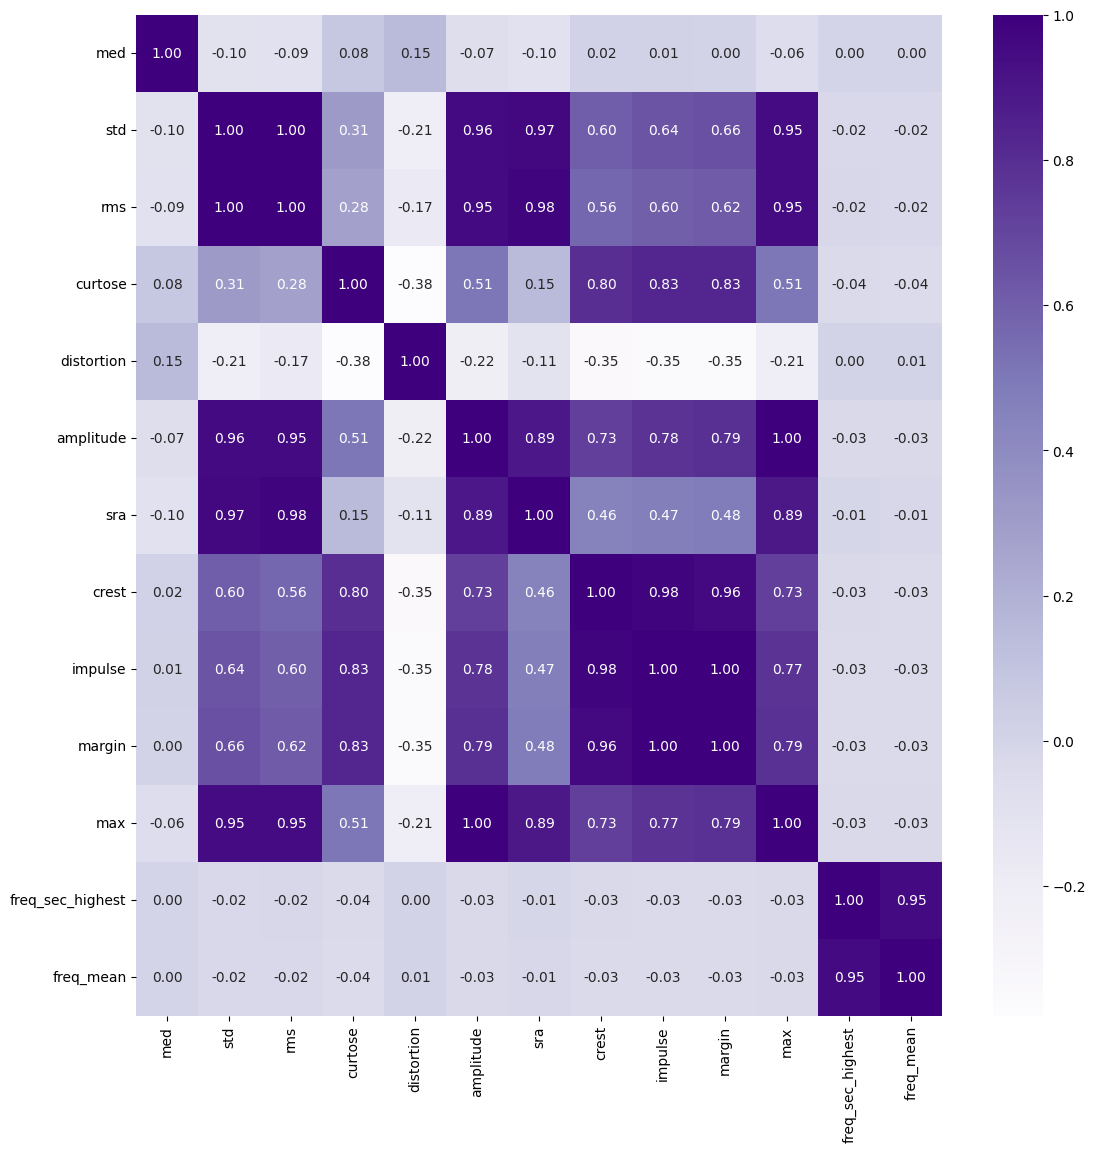

In [20]:
dataframe.corr(method="pearson")

plt.figure(figsize=(13,13))
sns.heatmap(dataframe.corr(), annot=True, fmt=".2f", cmap='Purples')
plt.show()

Os experimentos apresentaram médias de frequências quase iguais(?)

<AxesSubplot: xlabel='chatter_presence', ylabel='freq_sec_highest'>

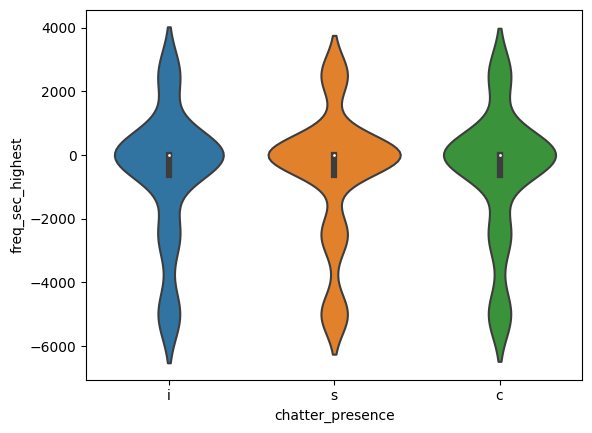

In [21]:
sns.violinplot(data=dataframe, x='chatter_presence', y='freq_sec_highest')

# models

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *

from sklearn.model_selection import GridSearchCV

In [23]:
lreg = LinearRegression()
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()

In [24]:
dataframe = pd.get_dummies(dataframe, columns=['chatter_presence'], drop_first=True)
dataframe.head(1)


,Experiment,med,std,rms,curtose,distortion,amplitude,sra,crest,impulse,margin,max,freq_max,freq_sec_highest,freq_mean,chatter_presence_i,chatter_presence_s
0,i_570_002_split_2_noise_added,0.005509,0.003118,0.006329,3.245333,1777.397601,0.033926,0.005314,3.510712,3.907285,4.181948,0.022221,None,2.560164,-1.280082,1,0


In [25]:
dataframe["chatter_presence_s"] = dataframe["chatter_presence_s"].astype('bool')
dataframe["chatter_presence_i"] = dataframe["chatter_presence_i"].astype('bool')
dataframe.dtypes

Experiment             object
med                   float64
std                   float64
rms                   float64
curtose               float64
distortion            float64
amplitude             float64
sra                   float64
crest                 float64
impulse               float64
margin                float64
max                   float64
freq_max               object
freq_sec_highest      float64
freq_mean             float64
chatter_presence_i       bool
chatter_presence_s       bool
dtype: object

In [26]:
y = dataframe['chatter_presence_s']
x = dataframe.copy().drop(['Experiment', 'chatter_presence_s', 'freq_max'], axis="columns", inplace=False)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)

## Linear

In [56]:
lreg.fit(x_train, y_train)

LinearRegression()

In [57]:
lreg_pred = lreg.predict(x_test)

In [58]:
r2_linear = r2_score(y_test, lreg_pred)

In [59]:
mae_linear = mean_absolute_error(y_test, lreg_pred)

## Random Forest

In [60]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [61]:
rf_pred = rf.predict(x_test)

In [62]:
r2_rf = r2_score(y_test, rf_pred)

In [63]:
mae_rf = mean_absolute_error(y_test, rf_pred)

## Decision Tree


In [64]:
dt.fit(x_train, y_train)

/home/naju/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/home/naju/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/naju/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/home/naju/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/home/naju/.local/lib/python3.10/site-packages/skl

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'poisson', 'mae'],
                         'max_depth': [3, 5, 8, 15]})

In [65]:
dt_pred = dt.predict(x_test)

In [66]:
r2_score(y_test, dt_pred)

0.5763075328459484

In [67]:
mean_absolute_error(y_test, dt_pred)

0.19718687990705516

In [68]:
params = {
    'criterion': ['mse', 'poisson', 'mae'],
    'max_depth': [3,5,8,15]
}

In [69]:
dt = GridSearchCV(DecisionTreeRegressor(), params, cv=5)
dt.get_params().keys()
dt.fit(x_train, y_train)
dt.best_estimator_ # criterion='mse', max_depth=5


/home/naju/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/home/naju/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/naju/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/home/naju/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/home/naju/.local/lib/python3.10/site-packages/skl

DecisionTreeRegressor(criterion='poisson', max_depth=3)

In [70]:
dt.best_estimator_.fit(x_train, y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=3)

In [71]:
dt_pred = dt.predict(x_test)

In [72]:
r2_dt_best_est = r2_score(y_test, dt_pred)

In [73]:
mae_dt_best_est = mean_absolute_error(y_test, dt_pred)

## SVM


In [74]:
classifier_linear = SVC(kernel = 'linear', random_state = 0)
classifier_linear.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [75]:
svm_linear_pred = classifier_linear.predict(x_test)

In [76]:
acc_svm_linear = accuracy_score(y_test, svm_linear_pred)

In [77]:
classifier_rbf = SVC(kernel = 'rbf', random_state = 0)
classifier_rbf.fit(x_train, y_train)

SVC(random_state=0)

In [78]:
svm_rbf_pred = classifier_rbf.predict(x_test)

In [79]:
acc_svm_rbf = accuracy_score(y_test, svm_rbf_pred)

# Results

In [104]:
model_results = pd.DataFrame(
    np.array([[r2_linear, r2_rf, r2_dt_best_est], 
    [mae_linear, mae_rf, mae_dt_best_est]]), 
    columns=['linear_regressor', 'random_forest', 'decision_tree'],
    index=['r2_score', 'mean_absolute_error']
)

In [105]:
svm_results = pd.DataFrame(
    np.array([[acc_svm_linear, acc_svm_rbf]]), 
    columns=['svm_linear', 'svm_rbf'],
    index=['accuracy_score']
)

In [106]:
model_results.round(4) 

,linear_regressor,random_forest,decision_tree
r2_score,0.7611,0.9105,0.5763
mean_absolute_error,0.1658,0.0431,0.1972


In [107]:
svm_results.round(4)

,svm_linear,svm_rbf
accuracy_score,0.9178,0.7397
